In [ ]:
"""
Em xin phép được nộp thầy bài tập, bài tập này khác với bài tập trong file word vì em làm dựa trên dữ liệu về ngành IT từ TopCV.
"""

In [ ]:
cd ..

In [5]:
ls

 Volume in drive C is htN
 Volume Serial Number is 8829-B6D9

 Directory of c:\htN\UIT\lastyear\helping\main

04/12/2025  08:51 PM    <DIR>          .
04/12/2025  08:51 PM    <DIR>          ..
03/19/2025  09:54 AM               552 .env
04/12/2025  08:51 PM    <DIR>          crawler
04/12/2025  08:51 PM    <DIR>          data
               1 File(s)            552 bytes
               4 Dir(s)  136,087,490,560 bytes free


In [6]:
import pandas as pd

df = pd.read_csv(fr"data\job_details_full.csv")

In [7]:
df.head()

,Field,Experience,Location,Company Size,Salary,Job Requirements,URL
0,Dược phẩm / Y tế / Công nghệ sinh học,2 năm,Hà Nội,25-99 nhân viên,9 - 12 triệu,"Yêu cầu ứng viên\n• Nữ, tốt nghiệp Đại học, Ca...",https://www.topcv.vn/viec-lam/ke-toan-kiem-han...
1,Du lịch,3 năm,Hà Nội,100-499 nhân viên,15 - 18 triệu,Yêu cầu ứng viên\n- Trình độ: tốt nghiệp Đại h...,https://www.topcv.vn/viec-lam/ke-toan-thue-thu...
2,Xây dựng,Dưới 1 năm,Đà Nẵng,100-499 nhân viên,Thoả thuận,Yêu cầu ứng viên\n- Giới tính: Nam.\n- Trình đ...,https://www.topcv.vn/viec-lam/nhan-vien-ke-toa...
3,Bán lẻ - Hàng tiêu dùng - FMCG,3 năm,Hà Nội,25-99 nhân viên,16 - 20 triệu,Yêu cầu ứng viên\n• Tốt nghiệp Đại học chuyên ...,https://www.topcv.vn/viec-lam/ke-toan-tong-hop...
4,Bán lẻ - Hàng tiêu dùng - FMCG,1 năm,Hồ Chí Minh,25-99 nhân viên,10 - 12 triệu,"Yêu cầu ứng viên\n● Giới tính: Nữ, độ tuổi từ ...",https://www.topcv.vn/viec-lam/ke-toan-ban-hang...


In [9]:
import pandas as pd

def convert_experience(exp_str):
    if pd.isna(exp_str) or exp_str == 'N/A':
        return None
    
    # Handle "Không yêu cầu" (No requirement)
    if exp_str == 'Không yêu cầu':
        return 0
    
    # Handle "Dưới 1 năm" (Less than 1 year)
    if exp_str == 'Dưới 1 năm':
        return 0.5
    
    # Handle "Trên 5 năm" (More than 5 years)
    if exp_str == 'Trên 5 năm':
        return 6
    
    # Extract numeric value from strings like "1 năm", "2 năm", etc.
    try:
        # Split the string and get the first part (number)
        num = float(exp_str.split()[0])
        return num
    except:
        return None

# Read the CSV file
# df = pd.read_csv('data/job_details2.csv')

# Create a new column with numeric experience values
df['Experience_Numeric'] = df['Experience'].apply(convert_experience)

In [10]:
import re
import numpy as np

def convert_company_size(size_str):
    if pd.isna(size_str) or size_str == 'N/A':
        return np.nan
    
    if '1-9' in size_str:
        return 5  # midpoint of 1-9
    elif '10-24' in size_str:
        return 17  # midpoint of 10-24
    elif '25-99' in size_str:
        return 62  # midpoint of 25-99
    elif '100-499' in size_str:
        return 300  # midpoint of 100-499
    elif '500-1000' in size_str:
        return 750  # midpoint of 500-1000
    elif '1000+' in size_str:
        return 1500  # representative value for 1000+
    elif '3000+' in size_str:
        return 4000  # representative value for 3000+
    elif '5000+' in size_str:
        return 6000  # representative value for 5000+
    elif '10000+' in size_str:
        return 15000  # representative value for 10000+
    else:
        return np.nan
    
def convert_salary(salary_str):
    if pd.isna(salary_str) or salary_str == 'N/A' or salary_str == 'Thoả thuận':
        return np.nan
    
    # Check for USD values and convert to VND (rough conversion ~23000 VND per USD)
    if 'USD' in salary_str:
        # Extract USD values
        usd_values = re.findall(r'(\d+(?:,\d+)?(?:\.\d+)?)', salary_str)
        if len(usd_values) == 1:
            return float(usd_values[0].replace(',', '')) * 0.025
        elif len(usd_values) == 2:
            min_val = float(usd_values[0].replace(',', ''))
            max_val = float(usd_values[1].replace(',', ''))
            return ((min_val + max_val) / 2) * 0.025  # Average in USD * 25 (million VND)
        return np.nan
    
    # Extract numeric values from salary ranges in millions VND
    values = re.findall(r'(\d+(?:,\d+)?(?:\.\d+)?)', salary_str)
    if len(values) == 0:
        return np.nan
    elif len(values) == 1:
        if 'Từ' in salary_str or 'Tới' in salary_str:
            return float(values[0].replace(',', ''))
        else:
            return float(values[0].replace(',', ''))
    elif len(values) == 2:
        min_val = float(values[0].replace(',', ''))
        max_val = float(values[1].replace(',', ''))
        return (min_val + max_val) / 2  # Return average value
    
    return np.nan

In [11]:
import pandas as pd
import re

def clean_location(loc_str):
    if pd.isna(loc_str) or loc_str == 'N/A':
        return None
    
    # Handle cases with "& X nơi khác"
    if '&' in loc_str and 'nơi khác' in loc_str:
        # Extract the first location before "&"
        return loc_str.split('&')[0].strip()
    
    # Handle multiple locations separated by commas
    if ',' in loc_str:
        # Split by comma and clean each location
        locations = [loc.strip() for loc in loc_str.split(',')]
        return locations
    
    # Single location
    return loc_str.strip()

def create_location_columns(df):
    # Create a copy of the dataframe to avoid modifying the original
    df_clean = df.copy()
    
    # Clean the location column
    df_clean['Location_Clean'] = df_clean['Location'].apply(clean_location)
    
    # Get all unique locations
    all_locations = set()
    for locs in df_clean['Location_Clean'].dropna():
        if isinstance(locs, list):
            all_locations.update(locs)
        else:
            all_locations.add(locs)
    
    # Create a column for each location
    for loc in all_locations:
        df_clean[f'Location_{loc}'] = df_clean['Location_Clean'].apply(
            lambda x: 1 if (isinstance(x, list) and loc in x) or x == loc else 0
        )
    
    return df_clean


# Create the location columns
df = create_location_columns(df)

In [12]:
# Apply transformations
df['Company_Size_Numeric'] = df['Company Size'].apply(convert_company_size)
df['Salary_Numeric'] = df['Salary'].apply(convert_salary)

In [13]:
df.head(5)

,Field,Experience,Location,Company Size,Salary,Job Requirements,URL,Experience_Numeric,Location_Clean,Location_Đồng Nai,...,Location_Hà Nội,Location_Hồ Chí Minh,Location_Hà Nam,Location_Thái Bình,Location_Tây Ninh,Location_Lâm Đồng,Location_Quảng Trị,Location_Khánh Hoà,Company_Size_Numeric,Salary_Numeric
0,Dược phẩm / Y tế / Công nghệ sinh học,2 năm,Hà Nội,25-99 nhân viên,9 - 12 triệu,"Yêu cầu ứng viên\n• Nữ, tốt nghiệp Đại học, Ca...",https://www.topcv.vn/viec-lam/ke-toan-kiem-han...,2.0,Hà Nội,0,...,1,0,0,0,0,0,0,0,62.0,10.5
1,Du lịch,3 năm,Hà Nội,100-499 nhân viên,15 - 18 triệu,Yêu cầu ứng viên\n- Trình độ: tốt nghiệp Đại h...,https://www.topcv.vn/viec-lam/ke-toan-thue-thu...,3.0,Hà Nội,0,...,1,0,0,0,0,0,0,0,300.0,16.5
2,Xây dựng,Dưới 1 năm,Đà Nẵng,100-499 nhân viên,Thoả thuận,Yêu cầu ứng viên\n- Giới tính: Nam.\n- Trình đ...,https://www.topcv.vn/viec-lam/nhan-vien-ke-toa...,0.5,Đà Nẵng,0,...,0,0,0,0,0,0,0,0,300.0,NaN
3,Bán lẻ - Hàng tiêu dùng - FMCG,3 năm,Hà Nội,25-99 nhân viên,16 - 20 triệu,Yêu cầu ứng viên\n• Tốt nghiệp Đại học chuyên ...,https://www.topcv.vn/viec-lam/ke-toan-tong-hop...,3.0,Hà Nội,0,...,1,0,0,0,0,0,0,0,62.0,18.0
4,Bán lẻ - Hàng tiêu dùng - FMCG,1 năm,Hồ Chí Minh,25-99 nhân viên,10 - 12 triệu,"Yêu cầu ứng viên\n● Giới tính: Nữ, độ tuổi từ ...",https://www.topcv.vn/viec-lam/ke-toan-ban-hang...,1.0,Hồ Chí Minh,0,...,0,1,0,0,0,0,0,0,62.0,11.0


In [14]:
df = df.dropna(axis=0)

Number of jobs by location (excluding zero counts):
Hà Nội             180
Hồ Chí Minh         72
Bắc Ninh             7
Đà Nẵng              6
Thanh Hoá            3
Hưng Yên             3
Ninh Bình            2
Thái Bình            2
Bắc Giang            2
Đắk Lắk              2
Hà Nam               2
Đồng Nai             2
Thái Nguyên          2
Nam Định             1
Hải Dương            1
Bà Rịa-Vũng Tàu      1
Vĩnh Long            1
Quảng Ninh           1
Bình Dương           1
Đồng Tháp            1
Thừa Thiên Huế       1
Phú Thọ              1
Bình Phước           1
Nghệ An              1
Long An              1
Tây Ninh             1
Lâm Đồng             1
Khánh Hoà            1
dtype: int64


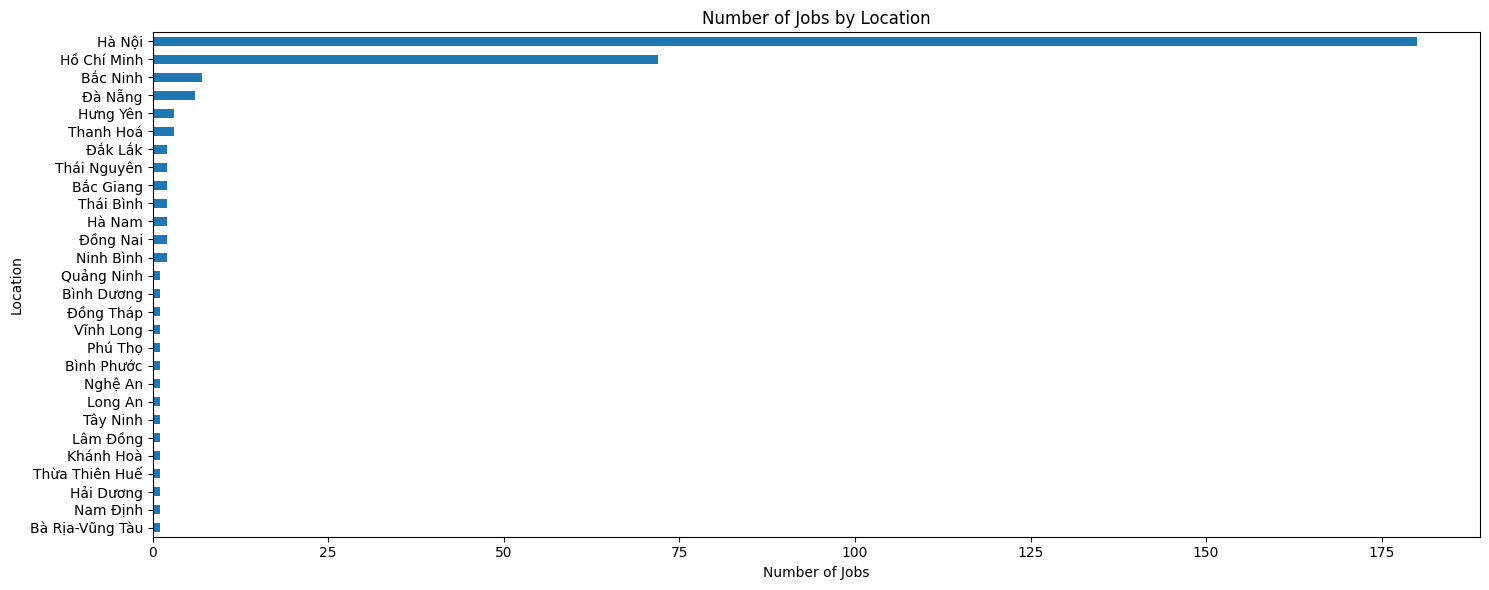

In [15]:
import matplotlib.pyplot as plt

# Get location counts and filter out zeros
location_counts = {}
for col in df.columns:
    if col.startswith('Location_') and col != 'Location_Clean':
        count = df[col].sum()
        if count > 0:  # Only include locations with count > 0
            location_counts[col.replace('Location_', '')] = count

# Sort the counts in descending order
sorted_counts = pd.Series(location_counts).sort_values(ascending=False)

# Print the counts
print("Number of jobs by location (excluding zero counts):")
print(sorted_counts)

# Create the bar plot
plt.figure(figsize=(15, 6))
sorted_counts.sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Jobs by Location')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

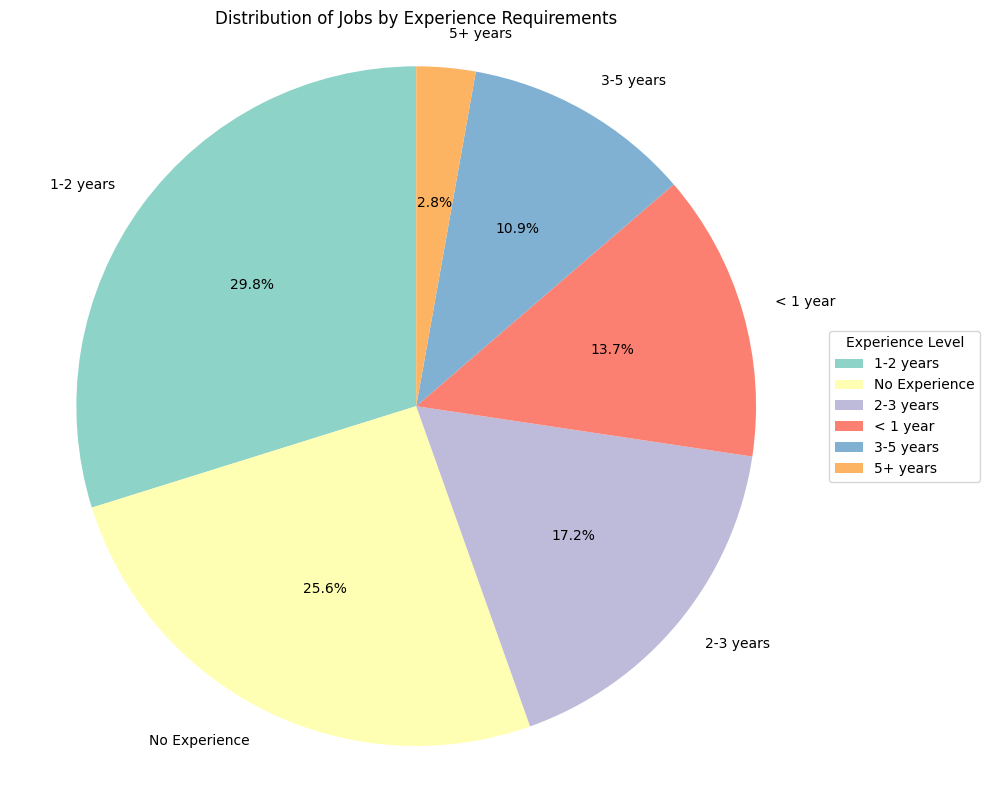

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

def categorize_experience(exp):
    if pd.isna(exp):
        return 'N/A'
    if exp == 0:
        return 'No Experience'
    if exp < 1:
        return '< 1 year'
    if exp < 2:
        return '1-2 years'
    if exp < 3:
        return '2-3 years'
    if exp < 5:
        return '3-5 years'
    return '5+ years'

df['Experience_Category'] = df['Experience_Numeric'].apply(categorize_experience)
experience_counts = df['Experience_Category'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(experience_counts.values, 
        labels=experience_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set3"))

plt.title('Distribution of Jobs by Experience Requirements')
plt.axis('equal')

# Add a legend
plt.legend(experience_counts.index, 
          title="Experience Level",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

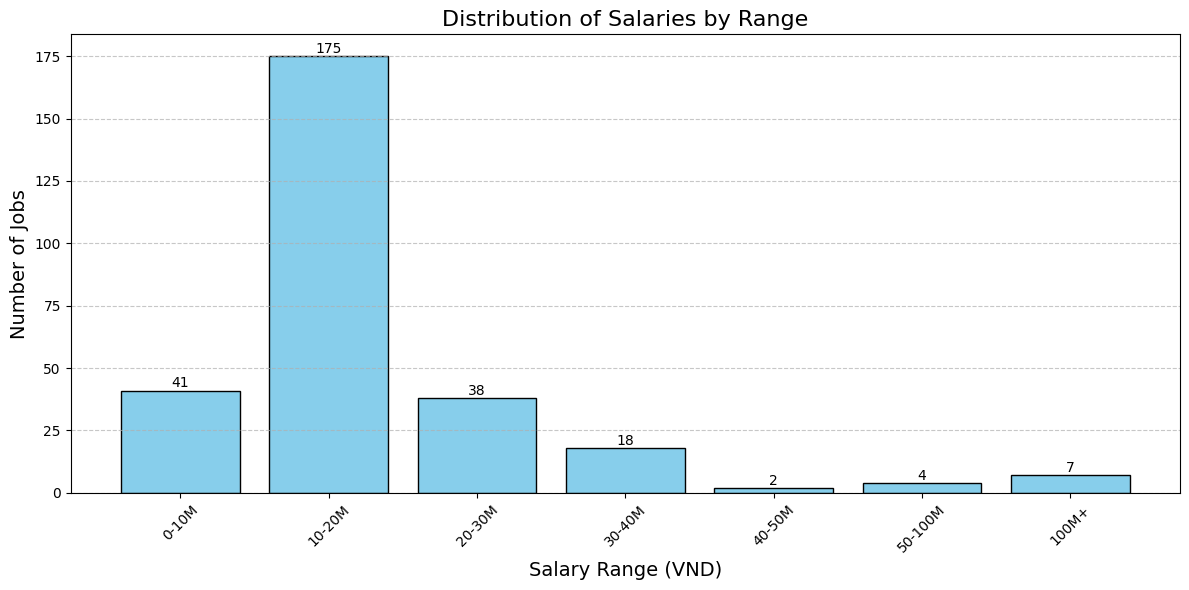

In [18]:
import matplotlib.pyplot as plt

# Define the salary ranges
salary_bins = [0, 10, 20, 30, 40, 50, 100, float('inf')]
salary_labels = ['0-10M', '10-20M', '20-30M', '30-40M', '40-50M', '50-100M', '100M+']

# Categorize the salaries
df['Salary_Range'] = pd.cut(df['Salary_Numeric'], bins=salary_bins, labels=salary_labels)

# Count the occurrences of each salary range
salary_counts = df['Salary_Range'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(salary_counts.index, salary_counts.values, color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height + 0.1, 
        f'{height:.0f}', 
        ha='center', va='bottom'
    )

# Customize the plot
plt.title('Distribution of Salaries by Range', fontsize=16)
plt.xlabel('Salary Range (VND)', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

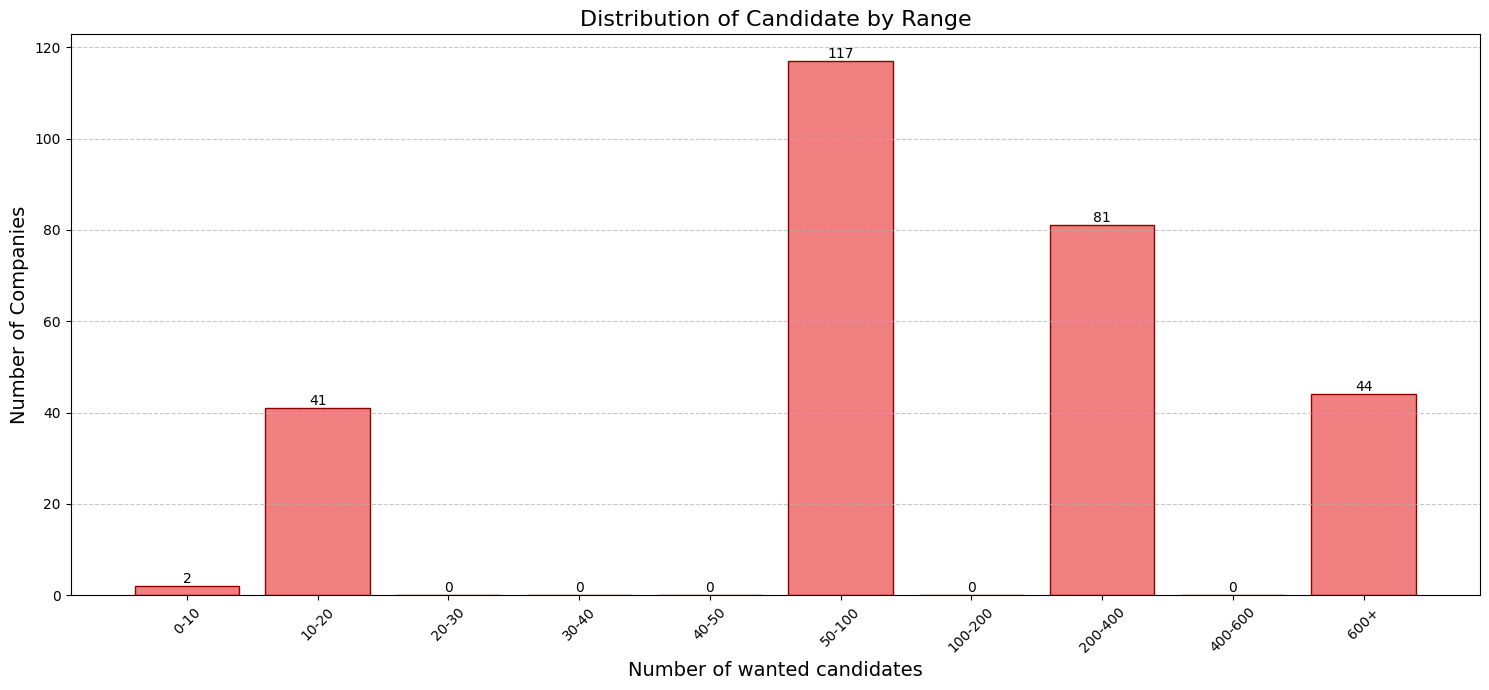

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the company size ranges
size_bins = [0, 10, 20, 30, 40, 50, 100, 200, 400, 600, float('inf')]
size_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-400', '400-600', '600+']

# Categorize the company sizes
df['Size_Range'] = pd.cut(df['Company_Size_Numeric'], bins=size_bins, labels=size_labels)

# Count the occurrences of each size range
size_counts = df['Size_Range'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(15, 7))
bars = plt.bar(size_counts.index, size_counts.values, color='lightcoral', edgecolor='darkred')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height + 0.1, 
        f'{height:.0f}', 
        ha='center', va='bottom'
    )

# Customize the plot
plt.title('Distribution of Candidate by Range', fontsize=16)
plt.xlabel('Number of wanted candidates', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

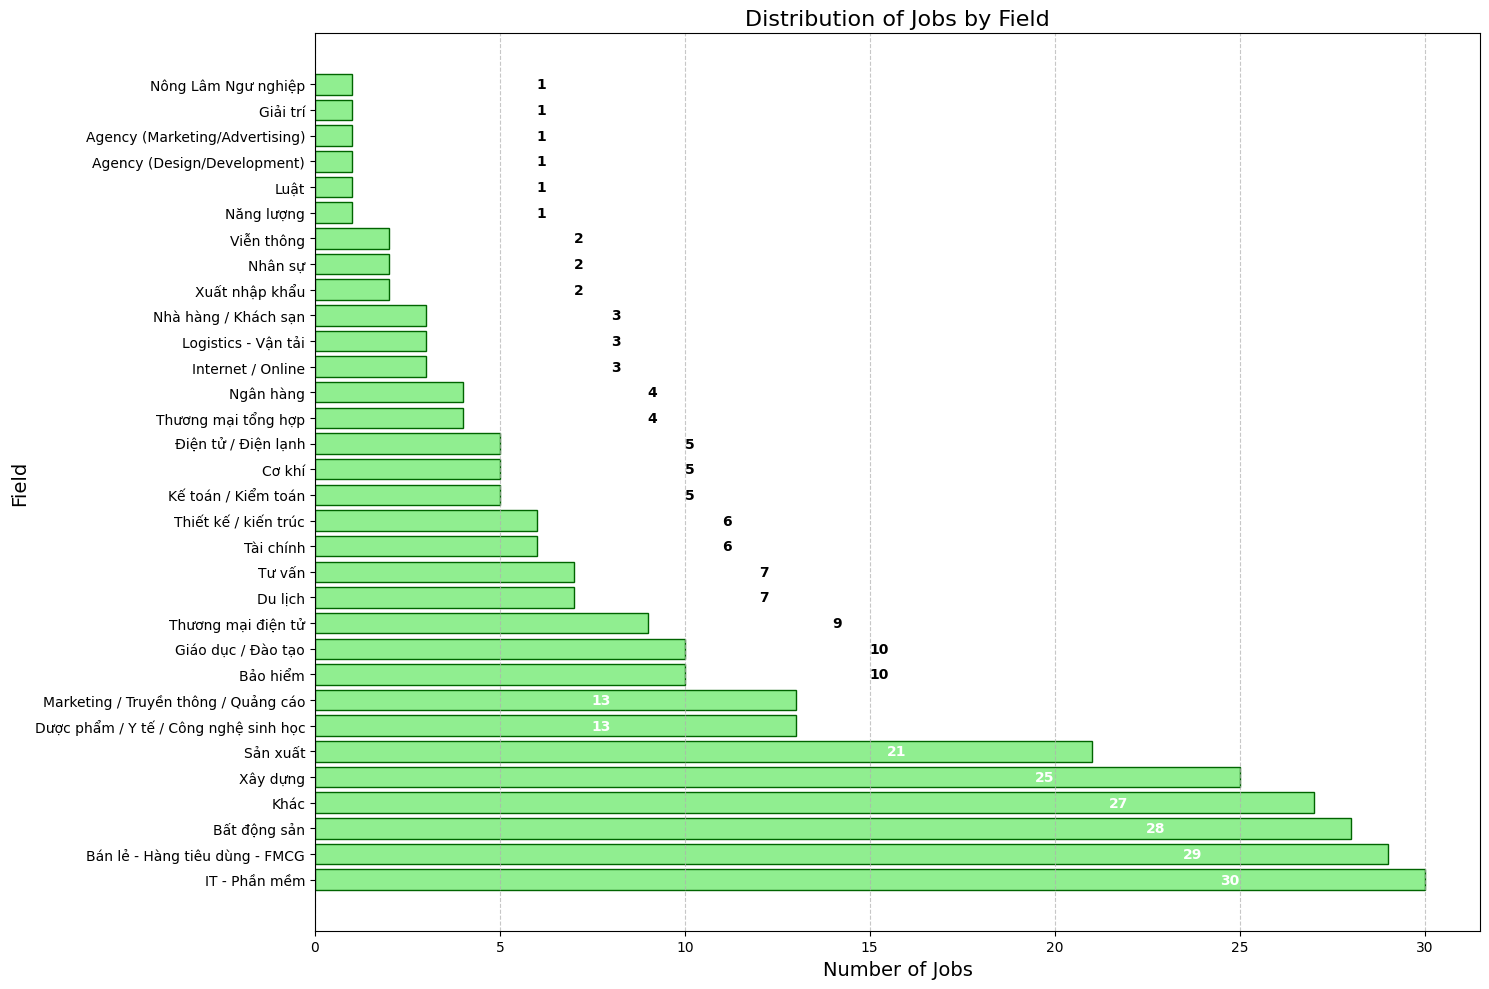

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each field
field_counts = df['Field'].value_counts()

# Alternative: Create a horizontal bar chart for better readability
plt.figure(figsize=(15, 10))
bars = plt.barh(field_counts.index, field_counts.values, color='lightgreen', edgecolor='darkgreen')

# Add value labels inside each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 5 if width > 10 else width + 5, 
        bar.get_y() + bar.get_height()/2,
        f'{width:.0f}',
        ha='right' if width > 10 else 'left',
        va='center',
        color='white' if width > 10 else 'black',
        fontweight='bold'
    )

plt.title('Distribution of Jobs by Field', fontsize=16)
plt.xlabel('Number of Jobs', fontsize=14)
plt.ylabel('Field', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()